X = [2.], Y = [0.75]
X = [2.], Y = [0.75]
X = [2.00000001], Y = [0.75000001]
X = [0.99999999], Y = [0.75000001]
X = [1.5], Y = [0.5]
X = [1.5], Y = [0.5]
X = [1.50000001], Y = [0.5]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
Minima found at:
X = [1.5], Y = 0.5
X = [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2
 2.3 2.4 2.5], Y = [1.5  1.31 1.14 0.99 0.86 0.75 0.66 0.59 0.54 0.51 0.5  0.51 0.54 0.59
 0.66 0.75 0.86 0.99 1.14 1.31 1.5 ]


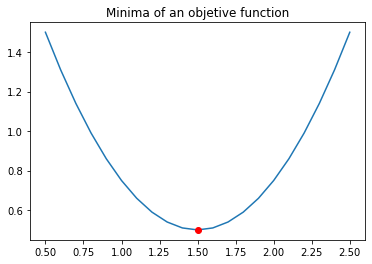

In [2]:
"""Minimize an objetive function, using SciPy"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo

def f(X):
  """Given a scalar X, return some value (a real number)."""
  Y = (X - 1.5)**2 + 0.5
  print("X = {}, Y = {}".format(X, Y)) # for tracing
  return Y

def test_run():
  Xguess = 2.0
  min_result = spo.minimize(f, Xguess, method='SLSQP', options={'disp': True})
  print("Minima found at:")
  print("X = {}, Y = {}".format(min_result.x, min_result.fun))

  # Plot function values, mark minima
  Xplot = np.linspace(0.5, 2.5, 21)
  Yplot = f(Xplot)
  plt.plot(Xplot, Yplot)
  plt.plot(min_result.x, min_result.fun, 'ro')
  plt.title("Minima of an objetive function")
  plt.show()

if __name__ == "__main__":
  test_run()

## 9.- Fit a line to given data points

In [ ]:
"""Fit a line to a given set of data points using optimization."""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo

def error(line, data):
  """Compute error between given line model and observed data.
  
  Parameters
  ----------
  line: tuple/list/array (C0, C1) where C0 is slope and C1 is Y-intercept
  data: 2D array where each row is a point (x, y)
  
  Returns error as a single real value.
  """

  # Metric: Sum of squared Y-axis differences
  err = np.sum((data[:, 1] - (line[0] * data[:, 0] + line[1])) ** 2)
  return err